## Домашнее задание

#### Описание задачи
В качестве метрики используется [AUC](https://www.kaggle.com/wiki/AreaUnderCurve).
#### Описание выборки  

##### APPLICATION_INFO.csv  
 - **id** - идентификатор счета
 - **application_dt** -  Дата подачи заявки
 - **sample_cd** -  Категория выборки
 - **education_cd** -  Образование
 - **gender_cd** -  Пол
 - **age** -  Возраст
 - **car_own_flg** -  Флаг наличия автомобиля
 - **car_type_flg** -  Флаг наличия иномарки
 - **appl_rej_cnt** -  Количество отказанных прошлых заявок
 - **good_work_flg** -  Флаг наличия "хорошей" работы
 - **Score_bki** -  Скор балл по данным из бюро кредитных историй
 - **out_request_cnt** -  Количество запросов в бюро
 - **region_rating** -  Рейтинг региона
 - **home_address_cd** -  Категаризатор домашнего адреса
 - **work_address_cd** -  Категаризатор рабочего адреса
 - **income** -  Доход заявителя
 - **SNA** -  Связь заявителя с клиентами
 - **first_time_cd** -  Давность наличия информации о заявителе
 - **Air_flg** -  Наличие загран паспорта
 
##### DEFAULT_FLG.csv  

 - **id** - идентификатор счета
 - **default_flg** -  Флаг дефолта по кредиту



Подключаем библиотеки

In [47]:
import pandas as pd              #Обработка табличных данных
import numpy as np               #Алгоритмы линейной алгебры
import matplotlib.pyplot as plt #Различные способы визуализации
from collections import Counter

%matplotlib inline

In [48]:
y = pd.read_csv('default_flg.csv', index_col='id')
print(y.shape)
y.head(2)

(180816, 1)


,default_flg
id,
1,0
2,0


#### Предобработка данных

Считываем данные из csv файла

In [49]:
df = pd.read_csv('application_info.csv', index_col='id')

У pandas основные типы данных:
* DataFrame - двумерные массивы
* Series - одномерный массим

In [50]:
type(df)

pandas.core.frame.DataFrame

У DataFrame есть много полезных методов для интерактивного анализа:
* `shape` - Размерность данных
* `head` - первые строки ((5 по умолчанию)
* `tail` - последние строки

In [51]:
df.shape

(205296, 18)

In [52]:
df.head(3)

,application_dt,sample_cd,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg
id,,,,,,,,,,,,,,,,,,
1,01JAN2014,train,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N
2,01JAN2014,train,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N
3,01JAN2014,train,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N


In [53]:
df.tail(2)

,application_dt,sample_cd,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg
id,,,,,,,,,,,,,,,,,,
205295,31MAR2015,test,PGR,M,27,Y,Y,1,0,-1.552576,0,50,1,3,32500,1,3,Y
205296,31MAR2015,test,GRD,F,44,N,N,0,1,-1.517509,4,50,1,3,30000,1,4,Y


In [54]:
df.columns

Index(['application_dt', 'sample_cd', 'education_cd', 'gender_cd', 'age',
       'car_own_flg', 'car_type_flg', 'appl_rej_cnt', 'good_work_flg',
       'Score_bki', 'out_request_cnt', 'region_rating', 'home_address_cd',
       'work_address_cd', 'income', 'SNA', 'first_time_cd', 'Air_flg'],
      dtype='object')

Типы полей

In [55]:
df.dtypes

application_dt      object
sample_cd           object
education_cd        object
gender_cd           object
age                  int64
car_own_flg         object
car_type_flg        object
appl_rej_cnt         int64
good_work_flg        int64
Score_bki          float64
out_request_cnt      int64
region_rating        int64
home_address_cd      int64
work_address_cd      int64
income               int64
SNA                  int64
first_time_cd        int64
Air_flg             object
dtype: object

Выведем сводную информацию по числовым признакам

In [56]:
df.describe()

,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd
count,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000
mean,39.354566,0.277297,0.169701,-1.967120,2.015826,57.332340,1.602218,2.520210,42251.807610,1.725864,2.791657
std,11.451011,0.782794,0.375371,0.488055,2.138564,13.262627,0.520577,0.689453,45183.110679,1.115876,1.024393
min,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000
25%,30.000000,0.000000,0.000000,-2.313894,1.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000
50%,37.000000,0.000000,0.000000,-1.990599,2.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000
75%,48.000000,0.000000,0.000000,-1.641914,3.000000,70.000000,2.000000,3.000000,50000.000000,2.000000,4.000000
max,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000


Выведем сводную информацию по строковым признакам

In [57]:
df.income.describe()

count     205296.000000
mean       42251.807610
std        45183.110679
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        50000.000000
max      1000000.000000
Name: income, dtype: float64

In [58]:
df.describe(include=['object'])

,application_dt,sample_cd,education_cd,gender_cd,car_own_flg,car_type_flg,Air_flg
count,205296,205296,204384,205296,205296,205296,205296
unique,333,3,5,2,2,2,2
top,18MAR2014,train,SCH,F,N,N,N
freq,1491,110148,100234,117400,139119,166471,172168


Изменим формат у столбца `application_date` на дату.

In [59]:
df['application_dt'] = pd.to_datetime(df['application_dt'], format='%d%b%Y')

С помощью `value_counts` можно считать кол-во значений

In [60]:
df.sample_cd.value_counts()

train       110148
validate     70668
test         24480
Name: sample_cd, dtype: int64

Встроенный метод `plot` у `DataFrame` и `Series` позволяет быстро строить диаграммы.

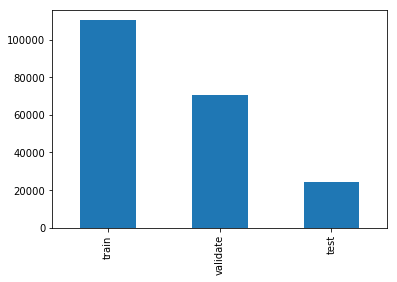

In [61]:
df.sample_cd.value_counts().plot(kind='bar');

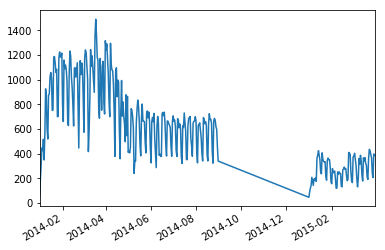

In [62]:
df.application_dt.value_counts().plot();

Запоминаем разбивку на обучение, валидацию и тест

In [63]:
train_index    = df[df.sample_cd =='train'].sample_cd.index
validate_index = df[df.sample_cd =='validate'].sample_cd.index
test_index     = df[df.sample_cd =='test'].sample_cd.index

trainandvalidate_index = df[(df.sample_cd != 'test')].sample_cd.index

df.drop(['sample_cd','application_dt'],axis=1,inplace=True) #Удаляем два столбца из выборки

Список категориальных полей

In [64]:
category_columns = [col for col in df.columns if df.dtypes[col] == 'object']
category_columns

['education_cd', 'gender_cd', 'car_own_flg', 'car_type_flg', 'Air_flg']

Поля с пустыми значениями

In [65]:
df.isnull().any()

education_cd        True
gender_cd          False
age                False
car_own_flg        False
car_type_flg       False
appl_rej_cnt       False
good_work_flg      False
Score_bki          False
out_request_cnt    False
region_rating      False
home_address_cd    False
work_address_cd    False
income             False
SNA                False
first_time_cd      False
Air_flg            False
dtype: bool

In [66]:
df.education_cd.value_counts(dropna=False)

SCH    100234
GRD     71417
UGR     28284
PGR      3841
NaN       912
ACD       608
Name: education_cd, dtype: int64

Заменим пустые значения на самое частое

In [67]:
df.education_cd.fillna('SCH', inplace=True)

Производим dummy кодирование не числовых полей

In [68]:
data_category = pd.get_dummies(df[category_columns], drop_first=True)
data_category.head(2)

,education_cd_GRD,education_cd_PGR,education_cd_SCH,education_cd_UGR,gender_cd_M,car_own_flg_Y,car_type_flg_Y,Air_flg_Y
id,,,,,,,,
1,0,0,1,0,1,1,1,0
2,1,0,0,0,0,0,0,0


Заменяем не числовые поля на dummy кодированные

In [69]:
df.drop(category_columns, axis=1, inplace=True)
df = pd.concat([df, data_category], axis=1)
df.shape

(205296, 19)

Проверяем типы полей

In [70]:
df.dtypes

age                   int64
appl_rej_cnt          int64
good_work_flg         int64
Score_bki           float64
out_request_cnt       int64
region_rating         int64
home_address_cd       int64
work_address_cd       int64
income                int64
SNA                   int64
first_time_cd         int64
education_cd_GRD      uint8
education_cd_PGR      uint8
education_cd_SCH      uint8
education_cd_UGR      uint8
gender_cd_M           uint8
car_own_flg_Y         uint8
car_type_flg_Y        uint8
Air_flg_Y             uint8
dtype: object

## Исследуем доход

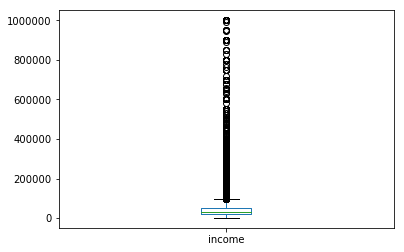

In [71]:
df.income.plot.box()

In [72]:
df[df.income > 200000].shape

(2043, 19)

### Довольно мало значений больше 200000, и они могут быть "outliers"

In [73]:
incomeNew = []
for inc in df.income:
    if (inc > 200000):
        incomeNew.append(200000)
    else:
        incomeNew.append(inc)
df.income = incomeNew

### Подкорректируем appl_rej_cnt и score_bki

In [74]:
Counter(df.appl_rej_cnt)

Counter({0: 169284,
         1: 24413,
         2: 6954,
         3: 2507,
         4: 1085,
         5: 471,
         6: 284,
         7: 113,
         8: 71,
         9: 40,
         10: 26,
         11: 11,
         12: 8,
         13: 8,
         14: 5,
         15: 2,
         16: 4,
         18: 3,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         24: 1,
         30: 1,
         33: 1})

In [75]:
newapplrejcnt = []
for val in df.appl_rej_cnt:
    if (val > 10):
        newapplrejcnt.append(10)
    else:
        newapplrejcnt.append(val)
df.appl_rej_cnt = newapplrejcnt

In [76]:
newscore = []
for score in df.Score_bki:
    newscore.append(int(score * 100))
Counter(newscore)

Counter({-362: 3,
         -359: 1,
         -358: 3,
         -357: 1,
         -356: 1,
         -355: 1,
         -354: 2,
         -353: 1,
         -352: 1,
         -351: 1,
         -349: 4,
         -348: 2,
         -347: 5,
         -345: 9,
         -344: 3,
         -343: 3,
         -342: 2,
         -341: 3,
         -340: 4,
         -339: 10,
         -338: 6,
         -337: 8,
         -336: 5,
         -335: 12,
         -334: 7,
         -333: 13,
         -332: 10,
         -331: 12,
         -330: 8,
         -329: 13,
         -328: 18,
         -327: 13,
         -326: 27,
         -325: 20,
         -324: 17,
         -323: 21,
         -322: 25,
         -321: 34,
         -320: 26,
         -319: 26,
         -318: 35,
         -317: 34,
         -316: 24,
         -315: 50,
         -314: 56,
         -313: 41,
         -312: 49,
         -311: 58,
         -310: 52,
         -309: 75,
         -308: 62,
         -307: 76,
         -306: 76,
         -305: 91

In [77]:
verynewscore = []
for score in newscore:
    if (score > -70):
        verynewscore.append(-70)
    elif (score < -300):
        verynewscore.append(-300)
    else:
        verynewscore.append(score)
df.Score_bki = verynewscore

In [78]:
Counter(df.out_request_cnt)

Counter({0: 50621,
         1: 50979,
         2: 39915,
         3: 26884,
         4: 16149,
         5: 9197,
         6: 4730,
         7: 2458,
         8: 1283,
         9: 835,
         10: 633,
         11: 449,
         12: 355,
         13: 246,
         14: 191,
         15: 90,
         16: 70,
         17: 37,
         18: 36,
         19: 32,
         20: 15,
         21: 19,
         22: 8,
         23: 14,
         24: 12,
         25: 5,
         26: 5,
         27: 5,
         28: 5,
         29: 3,
         32: 4,
         33: 2,
         34: 1,
         36: 1,
         40: 2,
         41: 1,
         45: 1,
         46: 1,
         47: 1,
         53: 1})

In [79]:
newoutrequest = []
for val in df.out_request_cnt:
    if (val > 15):
        newoutrequest.append(15)
    else:
        newoutrequest.append(val)
df.out_request_cnt = newoutrequest

## В возрасте аномалий не найдено

In [80]:
Counter(df.age)

Counter({21: 2174,
         22: 2366,
         23: 3812,
         24: 4922,
         25: 5988,
         26: 6865,
         27: 7286,
         28: 7611,
         29: 7464,
         30: 7604,
         31: 7737,
         32: 7207,
         33: 6693,
         34: 6535,
         35: 6302,
         36: 6116,
         37: 5975,
         38: 5930,
         39: 5826,
         40: 5546,
         41: 5283,
         42: 5270,
         43: 5063,
         44: 4786,
         45: 4152,
         46: 4074,
         47: 4000,
         48: 3949,
         49: 3772,
         50: 3847,
         51: 3701,
         52: 3821,
         53: 3779,
         54: 3597,
         55: 3402,
         56: 3064,
         57: 2902,
         58: 2584,
         59: 2462,
         60: 2263,
         61: 1805,
         62: 1572,
         63: 1388,
         64: 1209,
         65: 1158,
         66: 840,
         67: 707,
         68: 519,
         69: 245,
         70: 112,
         71: 9,
         72: 2})

## Gradient Boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn import linear_model
from sklearn.svm import SVC
print ('%8s %8s %4s' % ('Train','Validate','C'))
for C in [0.07, 0.08, 0.09, 0.1]:
    clf = GradientBoostingClassifier(learning_rate=C)
    clf.fit(df.loc[train_index], y.loc[train_index].default_flg) 
    AUC_validate = roc_auc_score(y.loc[validate_index].default_flg, clf.decision_function(df.loc[validate_index])[:,])
    AUC_train = roc_auc_score(y.loc[train_index].default_flg, clf.decision_function(df.loc[train_index])[:,])
    print('%.6f %.6f %f' %  (AUC_train, AUC_validate, C))

   Train Validate    C
0.740638 0.718905 0.070000
0.741498 0.719093 0.080000
0.742498 0.719150 0.090000
0.743407 0.719597 0.100000


Запускаем лучшее решение и сохраняем результат

In [82]:
bestF = GradientBoostingClassifier()
bestF.fit(df.loc[trainandvalidate_index], y.loc[trainandvalidate_index].default_flg)
test_pd = bestF.predict_proba(df.loc[test_index])[:,1]

Выводим коэффициенты

Сохраняем результат в csv

In [84]:
test_pd = pd.DataFrame(test_pd, columns=['score'], index=test_index)
test_pd.to_csv('my_submission.csv')
print(test_pd.shape)
test_pd.head(2)

(24480, 1)


,score
id,
180817,0.071463
180818,0.118978
